In [1]:
# IMPORTING PYTHON LIBRARIES AND LOADING THE DATA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv('data.csv')

# DESCRIPTIVE DATA ANALYSIS
## Basic Data Exploration

- Head of the dataset
- Shape of the dataset
- Info of the dataset
- Summary of the dataset

In [2]:
pd.set_option('display.max_columns', None)
# pd.reset_option('display.max_columns')

In [3]:
data.head()

,Price,departure_time,arrival_time,Airline,Cabin,Dept_city,Dept_date,arrival_city,stops,duration,weekday,dept_hours,Dept_flights_time,optimal_hours
0,3112,14:30,20:20,AirAsia,E,New Delhi,1,Mumbai,1,350,5,14,Afternoon_flight,11
1,3113,16:55,21:10,Go Air,E,New Delhi,1,Mumbai,1,255,5,16,Evening_flight,13
2,3113,16:45,21:05,Go Air,E,New Delhi,1,Mumbai,1,260,5,16,Evening_flight,13
3,3113,07:55,13:00,Go Air,E,New Delhi,1,Mumbai,1,305,5,7,Morning_flight,4
4,3113,09:00,14:20,Go Air,E,New Delhi,1,Mumbai,1,320,5,9,Morning_flight,6


In [4]:
data['departure_time'].unique()

array(['14:30', '16:55', '16:45', '07:55', '09:00', '20:55', '15:25',
       '12:40', '04:55', '11:55', '08:20', '08:00', '12:00', '02:40',
       '20:05', '18:00', '13:35', '16:05', '12:35', '22:45', '10:20',
       '06:50', '10:30', '05:45', '11:20', '12:30', '22:15', '06:15',
       '17:15', '09:45', '07:10', '03:00', '14:45', '16:40', '18:15',
       '11:35', '21:25', '11:10', '15:20', '11:30', '13:30', '08:35',
       '00:10', '16:15', '18:35', '18:55', '17:20', '06:05', '07:50',
       '16:20', '09:50', '01:05', '08:05', '13:50', '12:50', '15:00',
       '17:55', '01:50', '17:45', '17:25', '15:50', '05:35', '19:25',
       '11:45', '00:25', '10:00', '10:55', '06:00', '19:00', '17:40',
       '08:50', '16:30', '06:45', '05:50', '12:05', '21:15', '17:30',
       '15:45', '18:30', '09:15', '15:10', '22:50', '07:45', '11:25',
       '06:30', '13:05', '07:35', '17:10', '07:00', '08:30', '10:15',
       '07:30', '04:35', '00:15', '04:25', '19:30', '08:15', '10:05',
       '18:25', '04:

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330938 entries, 0 to 330937
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Price              330938 non-null  int64 
 1   departure_time     330938 non-null  object
 2   arrival_time       330938 non-null  object
 3   Airline            330938 non-null  object
 4   Cabin              330938 non-null  object
 5   Dept_city          330938 non-null  object
 6   Dept_date          330938 non-null  int64 
 7   arrival_city       330938 non-null  object
 8   stops              330938 non-null  int64 
 9   duration           330938 non-null  int64 
 10  weekday            330938 non-null  int64 
 11  dept_hours         330938 non-null  int64 
 12  Dept_flights_time  330938 non-null  object
 13  optimal_hours      330938 non-null  int64 
dtypes: int64(7), object(7)
memory usage: 35.3+ MB


In [6]:
data.shape

(330938, 14)

In [7]:
data.describe()

,Price,Dept_date,stops,duration,weekday,dept_hours,optimal_hours
count,330938.000000,330938.000000,330938.000000,330938.000000,330938.000000,330938.000000,330938.000000
mean,14074.894817,16.713064,1.278974,590.186636,2.902087,12.602539,12.568575
std,15968.136248,8.166245,0.802891,364.512309,2.088561,4.848977,6.882780
min,1579.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5450.000000,10.000000,1.000000,325.000000,1.000000,9.000000,7.000000
50%,7559.000000,17.000000,1.000000,515.000000,3.000000,12.000000,13.000000
75%,11742.000000,24.000000,2.000000,845.000000,5.000000,16.000000,18.000000
max,115432.000000,31.000000,6.000000,1435.000000,6.000000,23.000000,23.000000


In [8]:
# finding missing values in data
data.isnull().sum()

Price                0
departure_time       0
arrival_time         0
Airline              0
Cabin                0
Dept_city            0
Dept_date            0
arrival_city         0
stops                0
duration             0
weekday              0
dept_hours           0
Dept_flights_time    0
optimal_hours        0
dtype: int64

In [9]:
# insights 
# we can clearly see that we have no missing values
# now moving on to the next step 
# now applying exploratory data analysis

# DATA CLEANING
1. Checking for duplicate records in the data
2. Checking for garbage value in the data

In [10]:
#data cleaning - duplicate data
data.loc[data.duplicated(),:]

,Price,departure_time,arrival_time,Airline,Cabin,Dept_city,Dept_date,arrival_city,stops,duration,weekday,dept_hours,Dept_flights_time,optimal_hours
14128,12223,22:00,18:10,Air India,E,Hyderabad,4,Pune,3,1210,1,22,Night_flight,6
17390,17067,21:10,16:20,Air India,E,Patna,4,Thiruvananthapuram,3,1150,1,21,Night_flight,4
33103,10506,09:55,07:20,Air India,E,Chennai,7,Nagpur,3,1285,4,9,Morning_flight,9
33107,10506,06:10,07:20,Air India,E,Chennai,7,Nagpur,3,70,4,6,Morning_flight,6
35253,10617,08:55,07:20,Air India,E,Lucknow,7,Nagpur,3,1345,4,8,Morning_flight,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314809,49410,09:55,07:20,"Vistara, Air India",B,Amritsar,29,Nagpur,3,1285,5,9,Morning_flight,21
317022,52811,08:55,07:15,Air India,B,Lucknow,31,Chennai,3,1340,0,8,Morning_flight,19
317307,59764,09:40,07:15,"Vistara, Air India",B,Bhubaneswar,31,Chennai,3,1295,0,9,Morning_flight,19
317485,53090,12:10,07:15,Air India,B,Varanasi,31,Chennai,3,1145,0,12,Afternoon_flight,21


In [11]:
# drop the duplicate data
data = data.drop_duplicates(ignore_index = True)

In [12]:
data.columns

Index(['Price', 'departure_time', 'arrival_time', 'Airline', 'Cabin',
       'Dept_city', 'Dept_date', 'arrival_city', 'stops', 'duration',
       'weekday', 'dept_hours', 'Dept_flights_time', 'optimal_hours'],
      dtype='object')

In [13]:
 data[['Price', 'departure_time', 'arrival_time', 'Airline', 'Cabin',
       'Dept_city', 'Dept_date', 'arrival_city', 'stops', 'duration',
       'weekday', 'dept_hours', 'Dept_flights_time', 'optimal_hours']].nunique()

Price                16283
departure_time         248
arrival_time           256
Airline                 44
Cabin                    3
Dept_city               30
Dept_date               31
arrival_city            30
stops                    7
duration               288
weekday                  7
dept_hours              24
Dept_flights_time        4
optimal_hours           24
dtype: int64

In [14]:
# insight 
# checking for the columns datatypes which are numeric in nature but are in object datatype
# as we can see that departure_time is datatime column but written as object column

In [15]:
data.dtypes

Price                 int64
departure_time       object
arrival_time         object
Airline              object
Cabin                object
Dept_city            object
Dept_date             int64
arrival_city         object
stops                 int64
duration              int64
weekday               int64
dept_hours            int64
Dept_flights_time    object
optimal_hours         int64
dtype: object

In [16]:
data.head()

,Price,departure_time,arrival_time,Airline,Cabin,Dept_city,Dept_date,arrival_city,stops,duration,weekday,dept_hours,Dept_flights_time,optimal_hours
0,3112,14:30,20:20,AirAsia,E,New Delhi,1,Mumbai,1,350,5,14,Afternoon_flight,11
1,3113,16:55,21:10,Go Air,E,New Delhi,1,Mumbai,1,255,5,16,Evening_flight,13
2,3113,16:45,21:05,Go Air,E,New Delhi,1,Mumbai,1,260,5,16,Evening_flight,13
3,3113,07:55,13:00,Go Air,E,New Delhi,1,Mumbai,1,305,5,7,Morning_flight,4
4,3113,09:00,14:20,Go Air,E,New Delhi,1,Mumbai,1,320,5,9,Morning_flight,6


In [17]:
# from datetime import datetime, timedelta
# data['departure_time'] = pd.to_datetime(data['departure_time']).apply(lambda x: timedelta(hours=x.time().hour, minutes=x.time().minute))

# data['arrival_time'] = pd.to_datetime(data['arrival_time']).apply(lambda x: timedelta(hours=x.time().hour, minutes=x.time().minute))

# data['time_diff'] = data['arrival_time']-data['departure_time']

In [18]:
data.head(5)

,Price,departure_time,arrival_time,Airline,Cabin,Dept_city,Dept_date,arrival_city,stops,duration,weekday,dept_hours,Dept_flights_time,optimal_hours
0,3112,14:30,20:20,AirAsia,E,New Delhi,1,Mumbai,1,350,5,14,Afternoon_flight,11
1,3113,16:55,21:10,Go Air,E,New Delhi,1,Mumbai,1,255,5,16,Evening_flight,13
2,3113,16:45,21:05,Go Air,E,New Delhi,1,Mumbai,1,260,5,16,Evening_flight,13
3,3113,07:55,13:00,Go Air,E,New Delhi,1,Mumbai,1,305,5,7,Morning_flight,4
4,3113,09:00,14:20,Go Air,E,New Delhi,1,Mumbai,1,320,5,9,Morning_flight,6


In [19]:
data.dtypes

Price                 int64
departure_time       object
arrival_time         object
Airline              object
Cabin                object
Dept_city            object
Dept_date             int64
arrival_city         object
stops                 int64
duration              int64
weekday               int64
dept_hours            int64
Dept_flights_time    object
optimal_hours         int64
dtype: object

In [20]:
data.nunique()

Price                16283
departure_time         248
arrival_time           256
Airline                 44
Cabin                    3
Dept_city               30
Dept_date               31
arrival_city            30
stops                    7
duration               288
weekday                  7
dept_hours              24
Dept_flights_time        4
optimal_hours           24
dtype: int64

<AxesSubplot:>

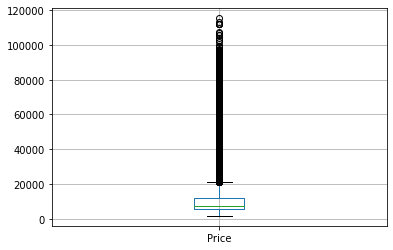

In [21]:
# handling Outlier
data.boxplot(column=['Price'])

<AxesSubplot:ylabel='Price'>

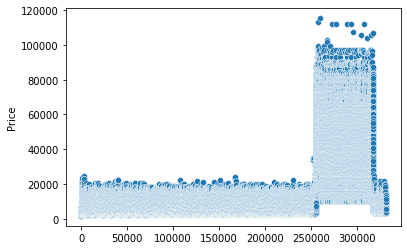

In [22]:
sns.scatterplot(data=data, x=data.index, y="Price")

<AxesSubplot:ylabel='Price'>

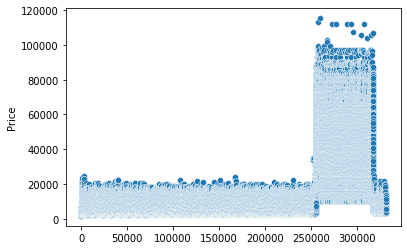

In [23]:
sns.scatterplot(data=data, x=data.index, y="Price")

350     2939
420     2661
400     2620
330     2606
75      2603
        ... 
10       364
215      350
35       350
1395     345
1430     336
Name: duration, Length: 288, dtype: int64

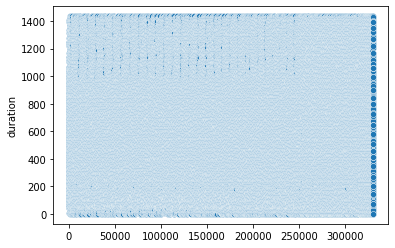

In [24]:
sns.scatterplot(data=data, x=data.index, y="duration")
data['duration'].value_counts()

In [25]:
data.loc[data['Price']>100000].shape[0] /len(data) *100

0.004232471521513049

In [26]:
percentile_995 = np.quantile(data['Price'],0.995)
data.loc[data['Price']>percentile_995,'Price'] = percentile_995

<AxesSubplot:ylabel='Price'>

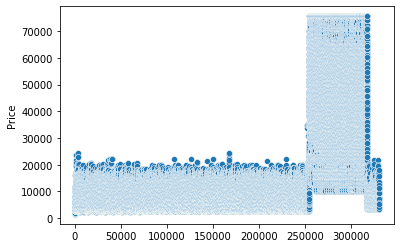

In [27]:
sns.scatterplot(data=data, x=data.index, y="Price")

In [28]:
data.dtypes

Price                 int64
departure_time       object
arrival_time         object
Airline              object
Cabin                object
Dept_city            object
Dept_date             int64
arrival_city         object
stops                 int64
duration              int64
weekday               int64
dept_hours            int64
Dept_flights_time    object
optimal_hours         int64
dtype: object

In [29]:
data['Airline'].value_counts()

Air India              111779
IndiGo                  88266
Spicejet                26657
Go Air                  25835
Vistara                 14426
AirAsia                 13729
IndiGo, Air India        5012
Air India, IndiGo        4861
IndiGo, Go Air           4513
Vistara, Air India       3763
Spicejet, IndiGo         3672
Go Air, IndiGo           3556
IndiGo, Spicejet         3186
IndiGo, AirAsia          2728
AirAsia, IndiGo          2261
Air India, Go Air        2257
Air India, Vistara       1709
Vistara, IndiGo          1508
Go Air, Air India        1496
IndiGo, Vistara          1157
Vistara, Go Air           908
Spicejet, Air India       819
Air India, Spicejet       763
AirAsia, Air India        762
Air India, AirAsia        761
AirAsia, Go Air           732
Spicejet, Go Air          689
Spicejet, AirAsia         550
Go Air, Spicejet          464
AirAsia, Spicejet         379
Go Air, Vistara           376
Go Air, AirAsia           304
Vistara, AirAsia          284
Spicejet, 

In [30]:
data['dept_airline'] = data['Airline'].str.strip().str.split(',').str[0]

In [31]:
data['arrival_airline'] = np.where(data['Airline'].str.strip().str.split(',').str[1].isnull(), data['Airline'].str.strip().str.split(',').str[0], data['Airline'].str.strip().str.split(',').str[1].str.strip())

In [32]:
data.drop(labels='Airline', axis=1, inplace=True)

# ENCODING CATAGORICAL VARIABLES

In [33]:
# ON COLUMN AIRLINE WE CAN  APPLY LABEL ENCODING

In [34]:
labelencoder = LabelEncoder()
data['dept_airline'] = labelencoder.fit_transform(data['dept_airline'])

In [35]:
pd.DataFrame(zip(labelencoder.classes_,range(len(labelencoder.classes_)))).to_csv('dept_airline_map.csv')

In [36]:
data['arrival_airline'] = labelencoder.fit_transform(data['arrival_airline'])

In [37]:
pd.DataFrame(zip(labelencoder.classes_,range(len(labelencoder.classes_)))).to_csv('arrival_airline_map.csv')

In [38]:
labelencoder = LabelEncoder()
data['Dept_city'] = labelencoder.fit_transform(data['Dept_city'])
pd.DataFrame(zip(labelencoder.classes_,range(len(labelencoder.classes_)))).to_csv('dept_city_map.csv')
data['arrival_city'] = labelencoder.fit_transform(data['arrival_city'])
pd.DataFrame(zip(labelencoder.classes_,range(len(labelencoder.classes_)))).to_csv('arrival_city_map.csv')

In [39]:
data.dtypes

Price                 int64
departure_time       object
arrival_time         object
Cabin                object
Dept_city             int32
Dept_date             int64
arrival_city          int32
stops                 int64
duration              int64
weekday               int64
dept_hours            int64
Dept_flights_time    object
optimal_hours         int64
dept_airline          int32
arrival_airline       int32
dtype: object

In [40]:
data.head(5)

,Price,departure_time,arrival_time,Cabin,Dept_city,Dept_date,arrival_city,stops,duration,weekday,dept_hours,Dept_flights_time,optimal_hours,dept_airline,arrival_airline
0,3112,14:30,20:20,E,19,1,17,1,350,5,14,Afternoon_flight,11,1,1
1,3113,16:55,21:10,E,19,1,17,1,255,5,16,Evening_flight,13,2,2
2,3113,16:45,21:05,E,19,1,17,1,260,5,16,Evening_flight,13,2,2
3,3113,07:55,13:00,E,19,1,17,1,305,5,7,Morning_flight,4,2,2
4,3113,09:00,14:20,E,19,1,17,1,320,5,9,Morning_flight,6,2,2


In [41]:
data['Cabin'].value_counts()
# data['Dept_flights_time'].value_counts()


E     254928
B      62709
PE     13139
Name: Cabin, dtype: int64

In [42]:
# onehotencoding preferrable
# cabin , Dept_flights_time 
cabin = pd.get_dummies(data['Cabin'])
dept_flights_time  = pd.get_dummies(data['Dept_flights_time'])

In [43]:
data = pd.concat([data,cabin,dept_flights_time],axis=1)
data.drop(['Cabin','Dept_flights_time'],axis=1, inplace = True )

In [44]:
data.dtypes

Price                int64
departure_time      object
arrival_time        object
Dept_city            int32
Dept_date            int64
arrival_city         int32
stops                int64
duration             int64
weekday              int64
dept_hours           int64
optimal_hours        int64
dept_airline         int32
arrival_airline      int32
B                    uint8
E                    uint8
PE                   uint8
Afternoon_flight     uint8
Evening_flight       uint8
Morning_flight       uint8
Night_flight         uint8
dtype: object

In [45]:
# checking correlation using heat map
data.head(5)

,Price,departure_time,arrival_time,Dept_city,Dept_date,arrival_city,stops,duration,weekday,dept_hours,optimal_hours,dept_airline,arrival_airline,B,E,PE,Afternoon_flight,Evening_flight,Morning_flight,Night_flight
0,3112,14:30,20:20,19,1,17,1,350,5,14,11,1,1,0,1,0,1,0,0,0
1,3113,16:55,21:10,19,1,17,1,255,5,16,13,2,2,0,1,0,0,1,0,0
2,3113,16:45,21:05,19,1,17,1,260,5,16,13,2,2,0,1,0,0,1,0,0
3,3113,07:55,13:00,19,1,17,1,305,5,7,4,2,2,0,1,0,0,0,1,0
4,3113,09:00,14:20,19,1,17,1,320,5,9,6,2,2,0,1,0,0,0,1,0


In [46]:
data.dtypes
data['departure_minute'] = pd.to_datetime(data['departure_time']).dt.minute / 60
data['arrival_hour'] = pd.to_datetime(data['arrival_time']).dt.hour 
data['arrival_minute'] = pd.to_datetime(data['arrival_time']).dt.minute / 60
data.drop(['departure_time','arrival_time'],inplace =True ,axis=1)
data.head(5)

,Price,Dept_city,Dept_date,arrival_city,stops,duration,weekday,dept_hours,optimal_hours,dept_airline,arrival_airline,B,E,PE,Afternoon_flight,Evening_flight,Morning_flight,Night_flight,departure_minute,arrival_hour,arrival_minute
0,3112,19,1,17,1,350,5,14,11,1,1,0,1,0,1,0,0,0,0.500000,20,0.333333
1,3113,19,1,17,1,255,5,16,13,2,2,0,1,0,0,1,0,0,0.916667,21,0.166667
2,3113,19,1,17,1,260,5,16,13,2,2,0,1,0,0,1,0,0,0.750000,21,0.083333
3,3113,19,1,17,1,305,5,7,4,2,2,0,1,0,0,0,1,0,0.916667,13,0.000000
4,3113,19,1,17,1,320,5,9,6,2,2,0,1,0,0,0,1,0,0.000000,14,0.333333


In [47]:
data.dtypes

Price                 int64
Dept_city             int32
Dept_date             int64
arrival_city          int32
stops                 int64
duration              int64
weekday               int64
dept_hours            int64
optimal_hours         int64
dept_airline          int32
arrival_airline       int32
B                     uint8
E                     uint8
PE                    uint8
Afternoon_flight      uint8
Evening_flight        uint8
Morning_flight        uint8
Night_flight          uint8
departure_minute    float64
arrival_hour          int64
arrival_minute      float64
dtype: object

In [48]:
x= data
x= x.drop(['optimal_hours'],axis=1)
y = data['optimal_hours']

In [49]:
x.columns

Index(['Price', 'Dept_city', 'Dept_date', 'arrival_city', 'stops', 'duration',
       'weekday', 'dept_hours', 'dept_airline', 'arrival_airline', 'B', 'E',
       'PE', 'Afternoon_flight', 'Evening_flight', 'Morning_flight',
       'Night_flight', 'departure_minute', 'arrival_hour', 'arrival_minute'],
      dtype='object')

In [50]:
# feature scaling
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
x = pd.DataFrame(std.fit_transform(x), columns=x.columns)

In [51]:
data = pd.concat([x,y] , axis= 1)

# spliting the data in train test split
from sklearn.model_selection import train_test_split
train,val  = train_test_split(data, test_size=0.20, random_state=42)

In [52]:
train_feature = train.drop(['optimal_hours'],axis=1)
train_target = train['optimal_hours']
val_feature = val.drop(['optimal_hours'],axis=1)
val_target = val['optimal_hours']

In [53]:
train_feature.shape , train_target.shape , val_feature.shape , val_target.shape

((264620, 20), (264620,), (66156, 20), (66156,))

## Feture Selection

In [54]:
from sklearn.feature_selection import f_regression

In [55]:
f_score, p_value = f_regression(train_feature, train_target)

In [56]:
data_dict = {
    'f_score': f_score,
    'p_value': p_value
}

In [57]:
feature_imp_df = pd.DataFrame(data_dict, index = train_feature.columns)

In [58]:
feature_imp_df.sort_values(by='f_score', ascending=False)

,f_score,p_value
dept_hours,4958.726105,0.000000e+00
Night_flight,4577.727199,0.000000e+00
Evening_flight,3526.237542,0.000000e+00
Morning_flight,2191.143332,0.000000e+00
Afternoon_flight,1866.828501,0.000000e+00
weekday,1019.427838,2.867726e-223
arrival_hour,665.886174,1.192383e-146
duration,231.444104,3.037855e-52
departure_minute,115.410305,6.481289e-27
dept_airline,91.198747,1.309898e-21


In [59]:
feature_imp_list = feature_imp_df[feature_imp_df.sort_values(by='f_score', ascending=False)['f_score']>20].index.tolist()

C:\Users\ASHISH~1\AppData\Local\Temp/ipykernel_8376/38990432.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  feature_imp_list = feature_imp_df[feature_imp_df.sort_values(by='f_score', ascending=False)['f_score']>20].index.tolist()


In [60]:
feature_imp_list.append('Price')

In [61]:
feature_imp_list

['Dept_city',
 'Dept_date',
 'duration',
 'weekday',
 'dept_hours',
 'dept_airline',
 'arrival_airline',
 'Afternoon_flight',
 'Evening_flight',
 'Morning_flight',
 'Night_flight',
 'departure_minute',
 'arrival_hour',
 'Price']

In [62]:
train_feature = train_feature[feature_imp_list]

In [63]:
val_feature = val_feature[feature_imp_list]

In [64]:
train_feature

,Dept_city,Dept_date,duration,weekday,dept_hours,dept_airline,arrival_airline,Afternoon_flight,Evening_flight,Morning_flight,Night_flight,departure_minute,arrival_hour,Price
259777,-1.033324,-1.556629,0.631442,-0.910536,-0.743243,-1.094068,-1.088786,-0.679915,-0.524902,1.262560,-0.299582,1.613641,1.601202,1.986117
58190,0.284372,-0.944347,-1.386102,1.483499,1.525255,1.118358,1.178528,-0.679915,1.905118,-0.792042,-0.299582,0.763112,1.411655,-0.665173
60546,-0.554162,-0.821891,1.152984,-1.389343,0.700347,-1.094068,-1.088786,-0.679915,1.905118,-0.792042,-0.299582,-0.654436,-1.052450,-0.074506
54032,-0.314581,-0.944347,-1.564525,1.483499,-0.743243,-1.094068,-1.088786,-0.679915,-0.524902,1.262560,-0.299582,0.196093,-1.052450,-0.066088
102145,1.721858,-0.332065,0.343222,0.525885,1.112801,1.118358,1.178528,-0.679915,1.905118,-0.792042,-0.299582,0.763112,-1.621089,-0.570737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,0.044791,-0.087153,2.237243,1.483499,-0.537016,0.565251,2.312185,-0.679915,-0.524902,1.262560,-0.299582,-1.504965,-1.052450,-0.263504
259178,0.404162,-1.556629,-0.507716,-0.910536,-0.537016,-1.094068,-1.088786,-0.679915,-0.524902,1.262560,-0.299582,-0.087417,0.463922,1.318611
131932,1.122905,0.035304,-1.193955,-1.389343,-1.155697,-1.094068,-1.088786,-0.679915,-0.524902,1.262560,-0.299582,1.046621,-0.862903,-0.343762
146867,-1.272905,0.280216,-0.150871,-0.431729,0.081666,0.565251,0.611700,1.470772,-0.524902,-0.792042,-0.299582,-0.937946,1.411655,-0.607258


## Linear Regression

In [65]:
from sklearn.linear_model import LinearRegression

In [66]:
model = LinearRegression()

In [67]:
model.fit(train_feature, train_target)

LinearRegression()

In [68]:
model.score(train_feature, train_target)

0.04005888454515283

In [69]:
model.score(val_feature, val_target)

0.03705086463250373

## Random Forest

In [70]:
from sklearn.ensemble import RandomForestRegressor

In [71]:
model = RandomForestRegressor(min_samples_leaf=6)

In [72]:
model.fit(train_feature, train_target)

RandomForestRegressor(min_samples_leaf=6)

In [73]:
model.score(train_feature, train_target)

0.9216789721805463

In [74]:
model.score(val_feature, val_target)

0.8764752043260923

### Evaluating the performance of model

In [75]:
##### Evaluate the performance of the fitted model #####

train_predictions = model.predict(train_feature) ### predict on the train features using the fitted model

val_predictions = model.predict(val_feature) ### predict on the val features using the fitted model

### Tests to evaluate the Model

In [76]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(val_target, val_predictions))
print('Mean Squared Error:', metrics.mean_squared_error(val_target, val_predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(val_target, val_predictions)))

Mean Absolute Error: 0.9806166680320731
Mean Squared Error: 5.841743138866103
Root Mean Squared Error: 2.416969825807948


### R Square Test

In [77]:
from sklearn.metrics import r2_score 

r_square_train_RF = r2_score(train_target,train_predictions)
r_square_validation_RF = r2_score(val_target, val_predictions)

In [78]:
r_square_train_RF

0.9216789721805463

In [79]:
r_square_validation_RF

0.8764752043260923

### Visual Evalutaion

In [80]:
optimal_hours = pd.DataFrame({'Actual Value': val_target, 'Predicted Value': val_predictions})

In [81]:
optimal_hours

,Actual Value,Predicted Value
77395,0,1.062580
159699,22,21.516010
233580,1,6.556570
321078,22,14.074146
133679,19,18.651717
...,...,...
225535,17,16.814066
101099,22,21.877857
107381,18,17.949703
64402,20,20.060622


<AxesSubplot:>

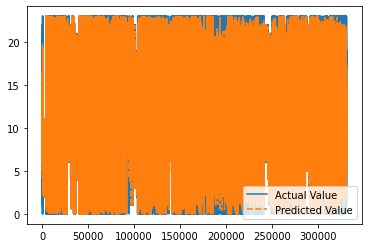

In [82]:
sns.lineplot(data=optimal_hours)

In [84]:
####### Save the model #####

##### Models are saved in something known as pickle file ########
import pickle
with open('models/random_forest_model.pickle', 'wb')  as f: ##### wb indictes open the file in write mode
    pickle.dump(model, f)